# __BPIC19 Case Study:__ _DyLoPro: Profiling the Dynamics of Event Logs_

__NOTE:__: This case study is performed with the ___beta version___ of the  ___DyLoPro___ library, which will be publically launched soon. 

This notebook contains the __extensive case study on the dynamics over time in the BPIC19 event log__, leveraging the beta version of the ___DyLoPro___ library. The BPIC19 event log can be downloaded [here](https://doi.org/10.4121/uuid:d06aff4b-79f0-45e6-8ec8-e19730c248f1). 

This notebook consists of __7 sections__, with each section corresponding to a certain event log conceptualization, for which it contains the most interesting identified trends, patterns or changes over time. In each section, the visualizations are accompanied with markdown cells discussing these distinctive dynamics over time. 

1. [__Variants__](#1-variants): The dynamics observed for the variants indicate significant and sudden changes in the control-flow perspective. 
1. [__Directly-Follows-Relations__](#2-directly-follows-relations-dfrs): The dynamics observed for the DFRs also indicate significant and sudden changes in the control-flow perspective.
1. [__Categorical Case Features__](#3-categorical-case-features): Interesting patterns and changes were observed for multiple categorical case features _(data perspective)_. 
1. [__Categorical Event Features__](#4-categorical-event-features): Interesting patterns and changes were observed for multiple categorical event features, including 'org:resource' _(resource perspective)_, 'Selected' & 'Accepted' _(both data perspective)_, and in 'concept:name', which contains the activity labels of the events _(control-flow perspective)_. 
1. [__Numerical Event Features__](#5-numerical-event-features): Only one numeric event feature is contained within the BPIC19 event log. Apart from outliers at the beginning and the end of the dataset, no prominant changes were detected. 

The BPIC19 event log contains no numerical case features. 

Importing pandas and the ___DyLoPro___ library. 

In [1]:
import pandas as pd
import DyLoPro as dlp

Reading in the event log. 

In [2]:
path_to_bpic19 = "BPIC19.csv"
log = pd.read_csv(path_to_bpic19, header = 0)
log['time:timestamp'] = pd.to_datetime(log['time:timestamp'], format='%Y-%m-%d %H:%M:%S%z').dt.tz_convert('UTC')
log['case:Item'] = log['case:Item'].astype('object')
log['case:Purchasing Document'] = log['case:Purchasing Document'].astype('object')

In [3]:
log['case:Spend area text'].value_counts()

Packaging                    583981
Sales                        360774
Logistics                    253565
Trading & End Products       126756
Additives                     95499
CAPEX & SOCS                  40074
Latex & Monomers              27007
Others                        15419
Solvents                      13889
Pigments & Colorants          13811
Marketing                     12994
Specialty Resins              12469
Titanium Dioxides              7453
Enterprise Services            5957
Real Estate                    3824
Workforce Services             3441
Commodity Resins               2374
Spend Area Unidentified         195
Energy                          142
Chemicals & Intermediates         5
Name: case:Spend area text, dtype: int64

Specifying the available features. The BPIC 19 event log contains no case outcome and no numeric case featuers. 

In [4]:
categorical_casefeatures=[ 'case:Spend area text', 'case:Company', 'case:Document Type', 
                          'case:Sub spend area text', 'case:Purchasing Document', 
                           'case:Vendor', 'case:Item Type', 
                          'case:Item Category', 'case:Spend classification text', 
                          'case:GR-Based Inv. Verif.', 'case:Goods Receipt']
categorical_eventfeatures = ['org:resource', 'concept:name', 'User']
numeric_eventfeatures= ['Cumulative net worth (EUR)']

Initializing a __DynamicLogPlots__ instance as ___bpic19_plots___. NOTE: As there are a few cases with erroneous timestamps (dating from 1948), we only want to analyze the trends for cases starting from 2018. 

In [5]:
bpic19_plots = dlp.DynamicLogPlots(log, case_id_key = 'case:concept:name', activity_key = 'concept:name', 
                                   timestamp_key = 'time:timestamp', categorical_casefeatures = categorical_casefeatures, 
                                   categorical_eventfeatures = categorical_eventfeatures, 
                                   numerical_eventfeatures = numeric_eventfeatures, start_date = "01/01/2018")

Preprocessing the data...


c:\Users\Brecht\anaconda3\envs\BPIC_2017\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
100%|██████████| 1587925/1587925 [00:00<00:00, 2729860.60it/s]
c:\Users\Brecht\anaconda3\envs\BPIC_2017\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Brecht\anaconda3\envs\BPIC_2017\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\Users\Brecht\anaconda3\envs\BPIC_2017\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


__NOTE__: For the BPIC19 plots, we use the default settings for the following common parameters unless specified otherwise:
- time_unit = 'days'
- frequency = 'weekly'
- case_assignment = 'first_event'
- plt_type = 'univariate'
- numeric_agg = 'mean'
- max_k = 10
- xtr_outlier_rem = True

## 1. Variants 
We investigate the dynamics over time for the top 10 most frequently occurring variants over time. The following interesting trends, patterns and changes were identified: 
1. Significant and sudden concept drift in the control-flow perspective around 2018-09:
    - __Variant 1__ originally delivered around 25-30% of the cases. Around 2018-09 it incurred a sudden and steep decline. 
    - Similar changes can be observed for __variants 2, 4, 5, 8 and 10__. 
    - __Variant 6__ on the other hand goes from being almost non-existent to being the main supplier at that exact same point in time. If we look a little bit closer at the differences between variant 6 and variant 1 (in the printed dataframe in the python cell below), it becomes apparant that variant 6 is almost identical to variant 1, except for the fact that it contains one additional activity as its starting activity: 'Create Purchase Requisition Item'. If we look at the plotted time series of the 10 most frequently occurring activities in section [__4.2__](#42-categorical-event-feature-conceptname), it is established that this sudden steep decline of __variant 1__ and the concurrent rise of __variant 6__ can be explained by the introduction of this new 'Create Purchase Requisition Item' starting activity. 
2. A gradual drift in the performance perspective (i.e. the throughput time of cases) (also) starting around 2018-09: 
    - Each plotting method always gives a global overview of the amount of cases belonging to each time period _(/in each sublog)_, as well as the global evolution of the throughput time of cases in case of `plt_type='type_tt'`. If we look at the evolution of the mean throughput time, we observe a gradual decline in the cases throughput time starting around this same point in time, 2018-09, converging to 0 towards the end of the event log. 
2. Interesting throughput time patterns for some variants: 
    - Cases belonging to __variants 3 and 9__ have a significantly shorter average throughput time compared to all other cases. When looking at their corresponding activity sequences, it is likely that this shorter TT is due to these variants only containing 2 activities. 
    - Before the change point of 2018-09, the pattern of the average throughput time of cases belonging to __variant 1__ being shorter than the average throughput time of all other cases remained relatively stable. This pattern however also broke down around 2018-09. 
    - ...

Retrieving the dataframe containing the activity sequences (and counts) of the top 10 most frequently occurring variants.

In [13]:
var_df = bpic19_plots.get_var_df(max_k = 10, counts = True)
print(var_df.to_string())

                                                                                                                                                            variant  variant count
variant number                                                                                                                                                                    
1                                                 (Create Purchase Order Item, Vendor creates invoice, Record Goods Receipt, Record Invoice Receipt, Clear Invoice)          50286
2                                                 (Create Purchase Order Item, Record Goods Receipt, Vendor creates invoice, Record Invoice Receipt, Clear Invoice)          30798
3                                                                                                                (Create Purchase Order Item, Record Goods Receipt)          12214
4                           (Create Purchase Order Item, Vendor creates invoice, Record Goods Receipt, Re

Representation type : __Throughput Time__ 

c:\Users\Brecht\anaconda3\envs\BPIC_2017\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
c:\Users\Brecht\anaconda3\envs\BPIC_2017\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
Computing additional weekly Throughput Time aggregations for each of the 6 most frequently occurring variants: 100%|██████████| 6/6 [00:00<00:00, 17.90it/s]


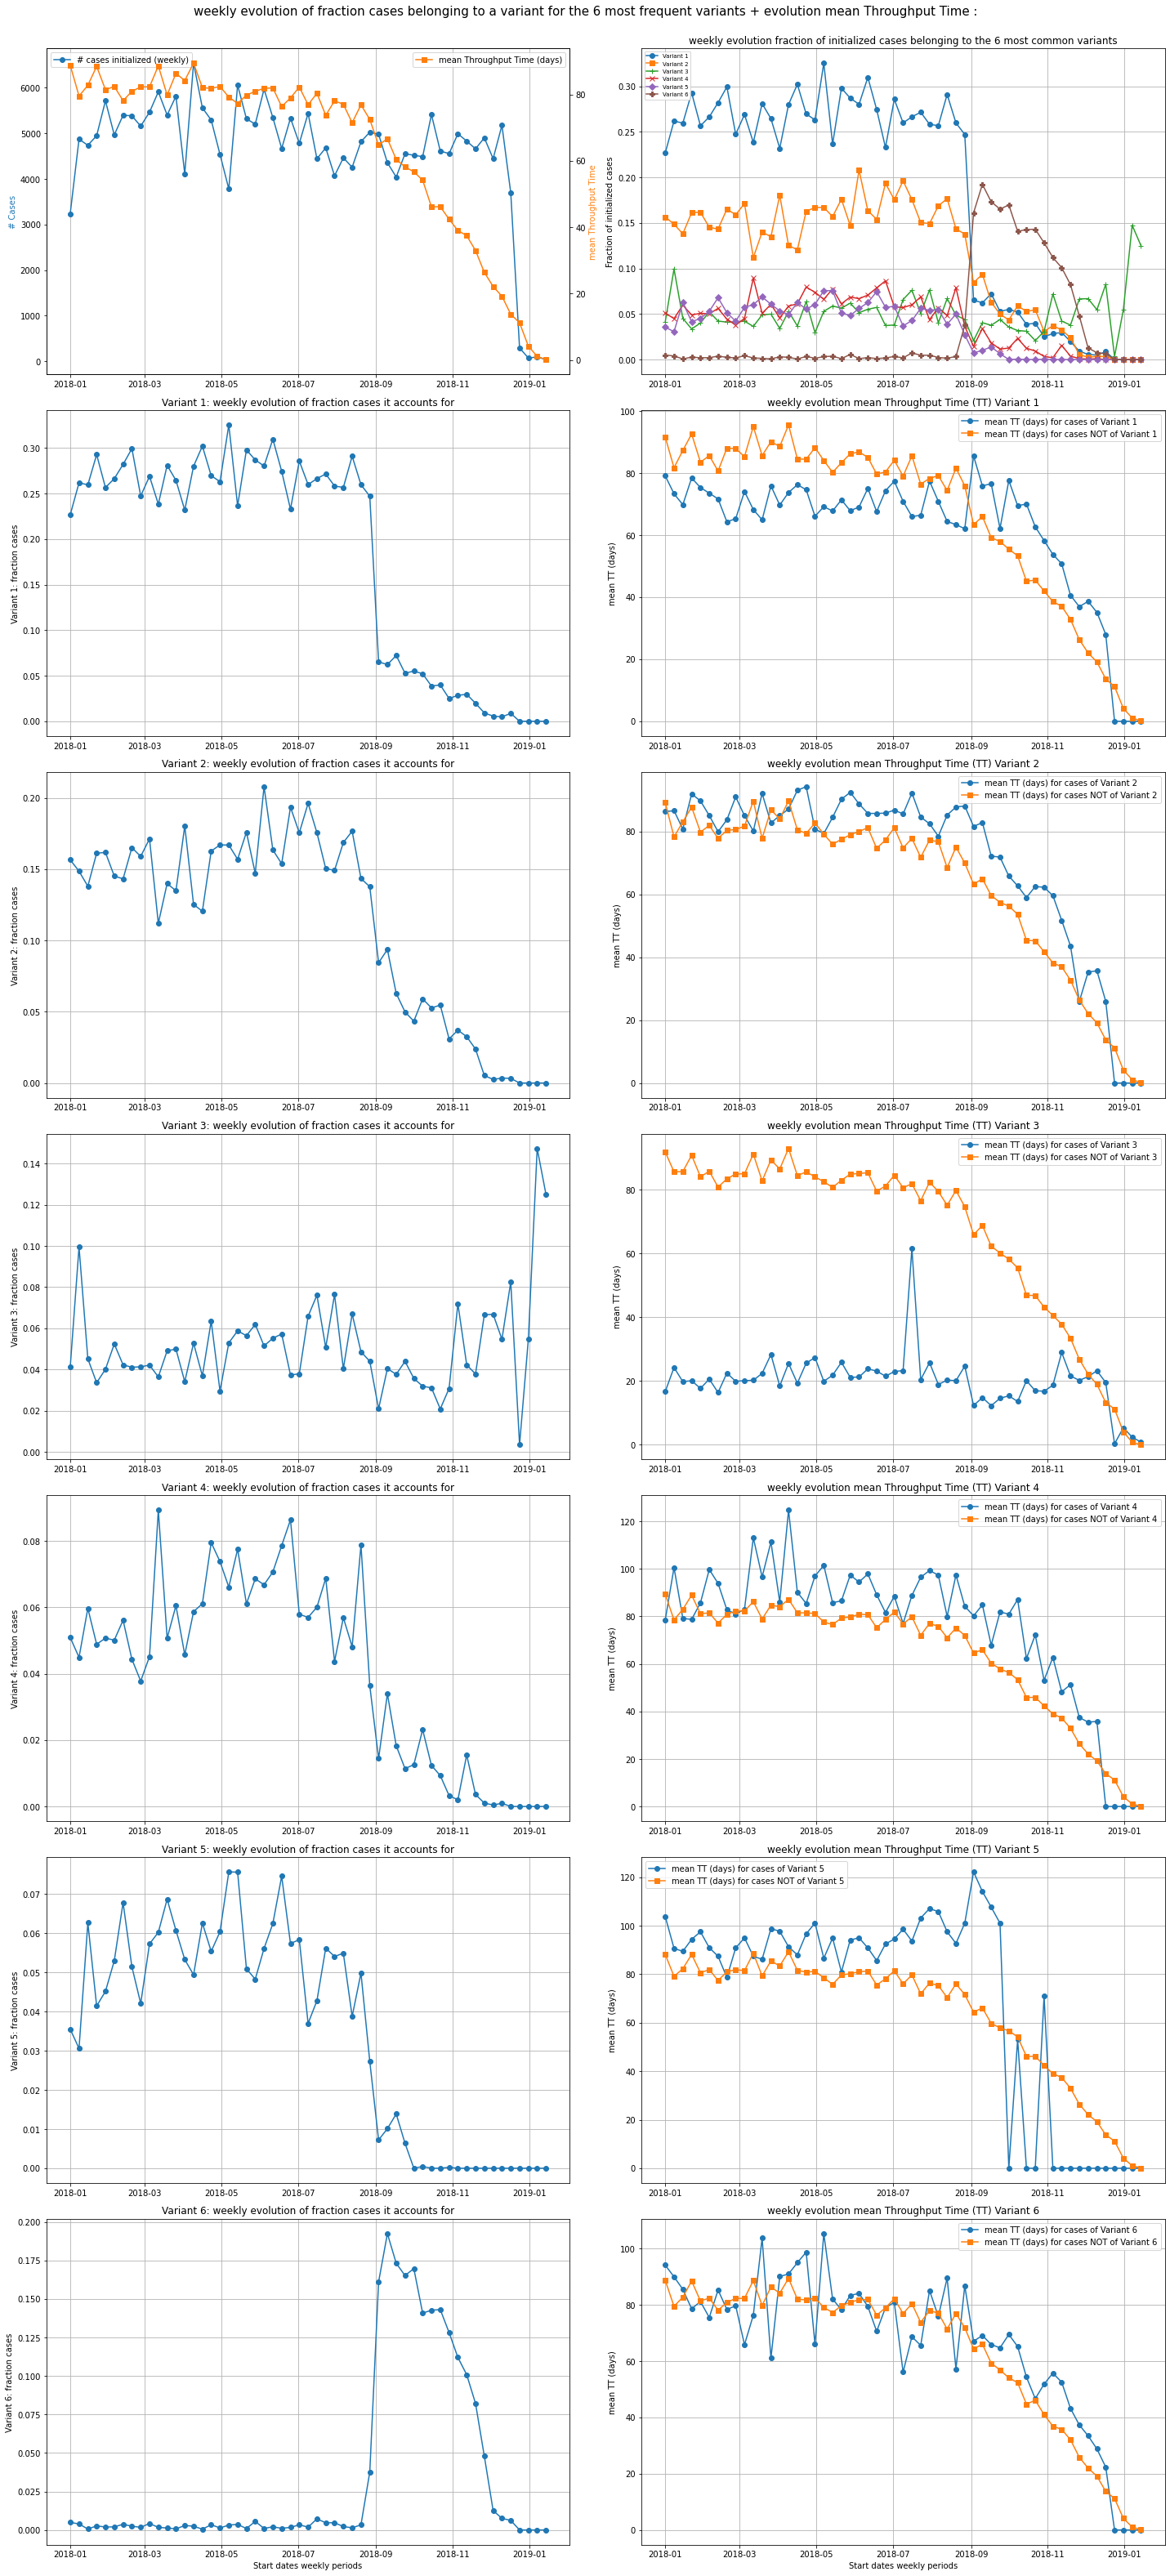

In [7]:
bpic19_plots.topK_variants_evol(max_k = 10, plt_type = 'type_tt', xtr_outlier_rem = False)

## __2. Directly-Follows-Relations (DFRs)__
We investigate the dynamics over time for the top 10 most frequently occurring DFRs over time. The following interesting trends, patterns and changes were identified: 
1. The changes in the control-flow perspective identified when examining the [__variants__](#1-variants) are also uncovered when examining the DFR dynamics. (These changes can be observed in all 3 subsections, since each `plt_type` option other than the `'univariate` also include the 'univariate' plots in the left panels.)
    - __DFR 2 and DFR 10__: Both the mean amount of occurrences per case and the fraction of cases with at least one occurrence of a certain DFR started to decline significantly around this exact same change point (2018-09). 
    - Other DFRs' mean amount of occurrences per case and fraction of cases exhibit remarkable patterns further towards the end of the dataset, but these can also be due to the fact that typically less cases are observed in the beginning and the end of the event log when extracting only completed cases. 
1. __DFR 1 and 9__ in general displays similar strange patterns. 
    1. Mean occurrences per case vs. fraction of cases with at least one occurrence: the mean amount of occurences per case is orders of magnitude greater than the fraction of cases that contain at least one occurrence of DFR 1 or 9.
    1. [Mean throughput time cases with at least one occurrence vs. mean throughput time all other cases](#21-representation-type--throughput-time): The mean throughput time of cases containing at least one occurrence of DFR 1 is significantly smaller than than the mean TT of cases that do not. The mean TT of cases containing at least one occurrence of DFR 9 is also seems to be smaller than the mean TT of cases that do not, but this difference is (far) less pronounced. 
    1. [Mean case length (NEPC) cases with at least one occurrence vs. mean NEPC all other cases](#22-representation-type--case-length): The mean number of events per case (NEPC) of cases containing __DFRs 1 or 9__ is drastically larger than the mean NEPC of cases that do not. This pattern remains stable over time for both DFRs. However, for both DFRs, the mean amount of occurences per case is orders of magnitude greater than the fraction of cases that contain at least one occurrence of DFR 1 or 9. On top of that, if we look at their corresponding activity pair (printed DFR table in python cell below) it becomes apparant that both __DFRs 1 and DFR 9__ consists of a repition of the same activities. These observations, combined with the observation in the first bullet point, indicate that these activities, if they occur, are repeated numerous times for the same case. However, this does not seem to negatively influence the throughput time of these cases. ___This might suggest that we are dealing with data entry errors, and that the immediate repitition of these activities might not correspond to actual rework.__
    1. [Mean DFR performance cases with at least one occurrence](#23-representation-type--dfr-performance):
1. [Mean throughput time cases with at least one occurrence vs. mean throughput time all other cases](#21-representation-type--throughput-time):
    1. Cases containing (at least one occurrence of) __DFRs 6, 7 or 10__ exhibit a significantly higher mean throughput time than cases who do not. This pattern remained relatively stable over time, until the same change point (2018-09). 
    1. Cases containing __DFR 1__ exhibit a significantly smaller throughput time than cases that don't. See supra. 
1. [Mean case length (NEPC) cases with at least one occurrence vs. mean NEPC all other cases](#22-representation-type--case-length):
    1. The mean number of events per case (NEPC) of cases containing __DFRs 1 or 9__ is drastically larger than the mean NEPC of cases that do not. This pattern remains stable over time for both DFRs. However, for both DFRs, the mean amount of occurences per case is orders of magnitude greater than the fraction of cases that contain at least one occurrence of DFR 1 or 9. On top of that, if we look at their corresponding activity pair (printed DFR table in python cell below) it becomes apparant that both __DFRs 1 and DFR 9__ consists of a repition of the same activities. 
1. A gradual drift in the performance perspective (i.e. the throughput time of cases) (also) starting around 2018-09: 
    - Each plotting method always gives a global overview of the amount of cases belonging to each time period _(/in each sublog)_, as well as the global evolution of the throughput time of cases in case of `plt_type='type_tt'`. If we look at the evolution of the mean throughput time, we observe a gradual decline in the cases throughput time starting around this same point in time, 2018-09, converging to 0 towards the end of the event log. 
1. Interesting throughput time patterns for some variants: 
    - Cases belonging to __variants 3 and 9__ have a significantly shorter average throughput time compared to all other cases. When looking at their corresponding activity sequences, it is likely that this shorter TT is due to these variants only containing 2 activities. 
    - Before the change point of 2018-09, the pattern of the average throughput time of cases belonging to __variant 1__ being shorter than the average throughput time of all other cases remained relatively stable. This pattern however also broke down around 2018-09. 
    - ...

Retrieving the dataframe containing the activity pairs (and counts) of the top 10 most frequently occurring DFRs.

In [21]:
dfr_df = bpic19_plots.get_DFR_df(max_k = 10, counts = True)
print(dfr_df.to_string())

                                                                 DFR  DFR count
DFR number                                                                     
1           (Record Service Entry Sheet, Record Service Entry Sheet)     138997
2                            (Record Invoice Receipt, Clear Invoice)     134503
3                     (Record Goods Receipt, Record Invoice Receipt)     111970
4                     (Vendor creates invoice, Record Goods Receipt)     109984
5               (Create Purchase Order Item, Vendor creates invoice)     103129
6                   (Vendor creates invoice, Record Invoice Receipt)      95055
7                     (Record Goods Receipt, Vendor creates invoice)      80604
8                 (Create Purchase Order Item, Record Goods Receipt)      77028
9                       (Record Goods Receipt, Record Goods Receipt)      54178
10                             (Remove Payment Block, Clear Invoice)      49399


#### 2.1 Representation type : __Throughput Time__ 

Computing additional weekly Throughput Time aggregations for each of the 10 most frequently occurring DFRs: 100%|██████████| 10/10 [00:01<00:00,  8.91it/s]


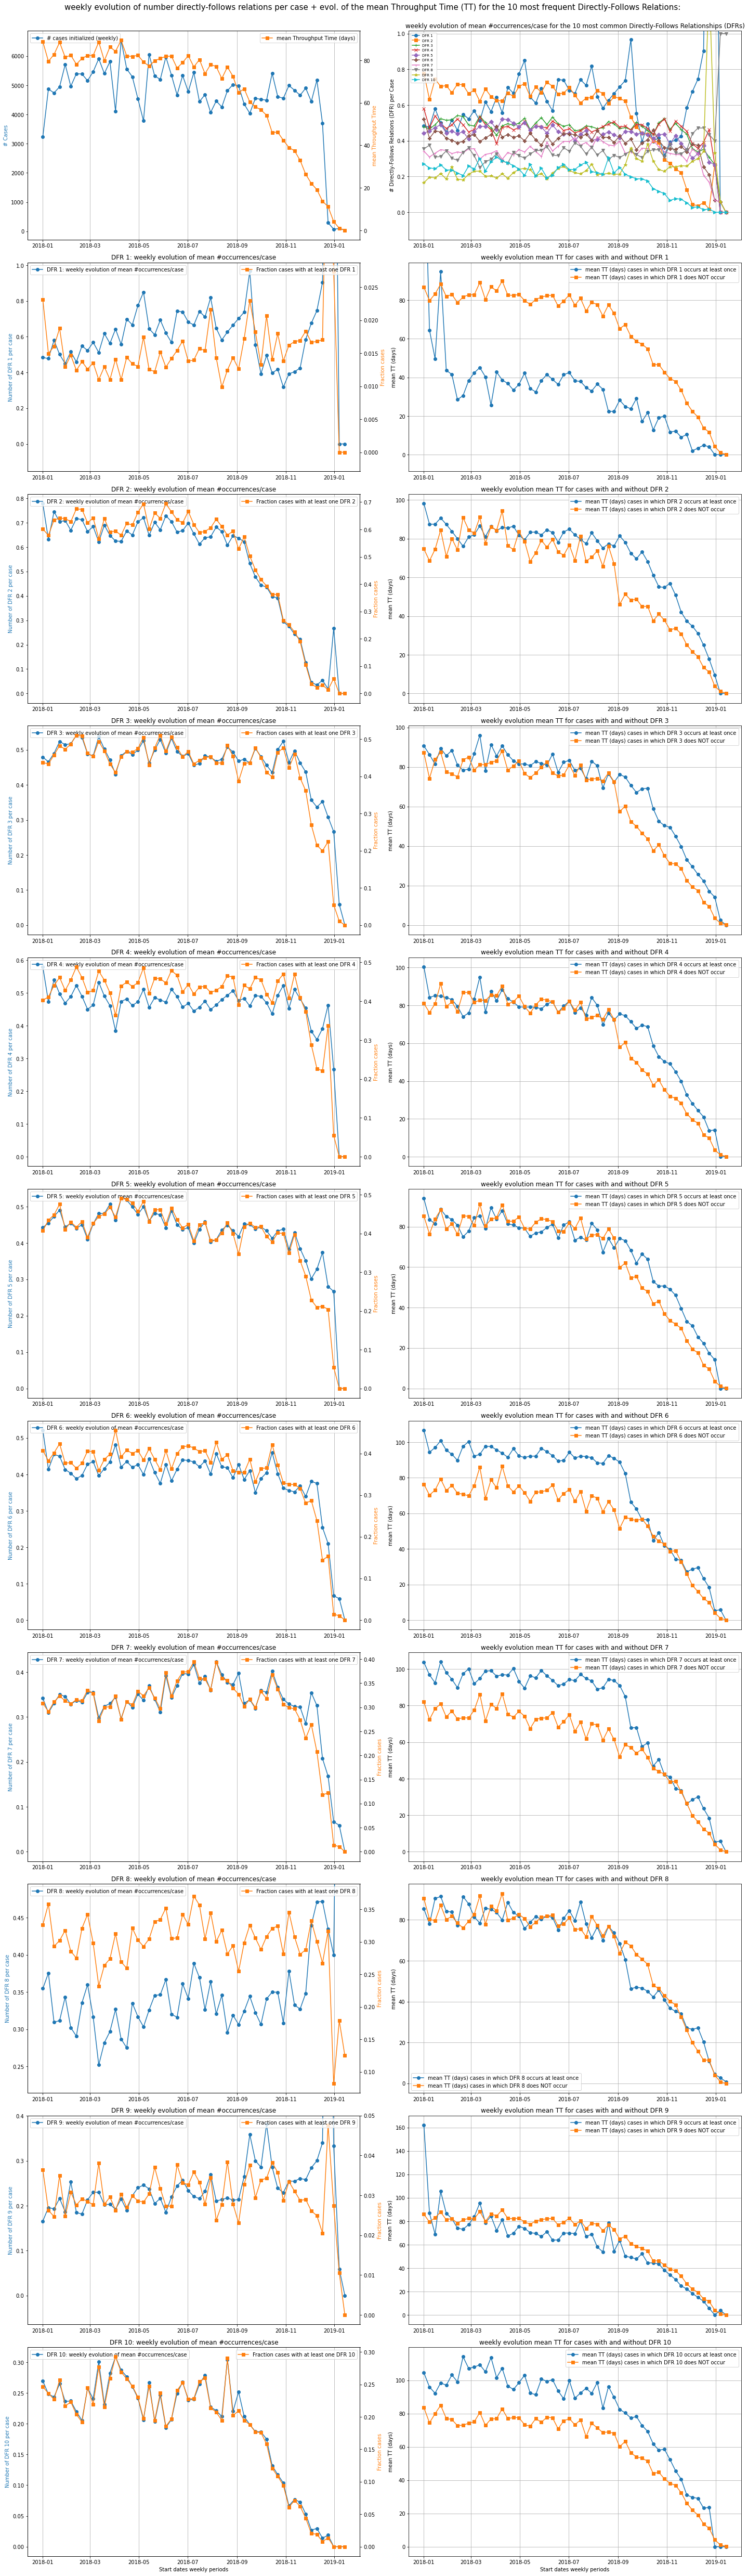

In [24]:
bpic19_plots.topK_dfr_evol(plt_type = 'type_tt')

#### 2.2 Representation type : __Case Length__ 

Computing additional weekly aggregations of the amount of events per case for each of the 10 most frequently occurring DFRs: 100%|██████████| 10/10 [00:00<00:00, 10.53it/s]


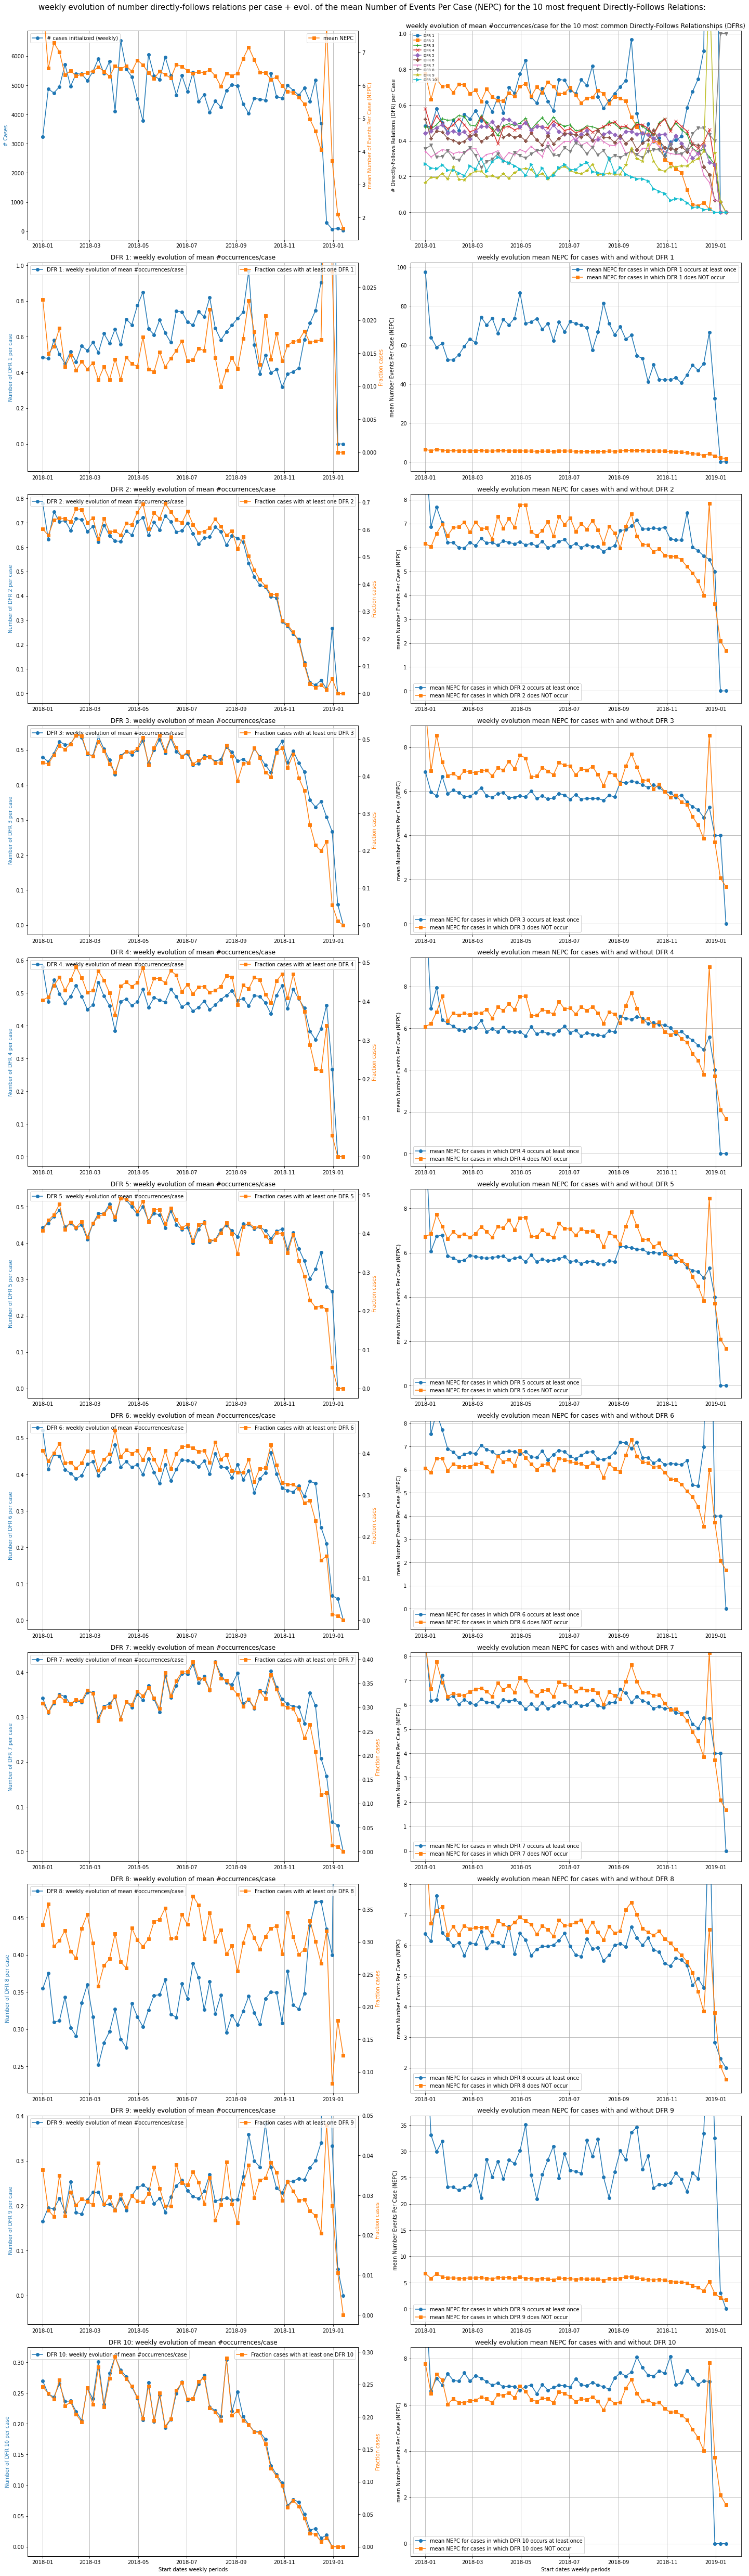

In [25]:
bpic19_plots.topK_dfr_evol(plt_type = 'type_events_case')

#### 2.3 Representation type : __DFR Performance__ 

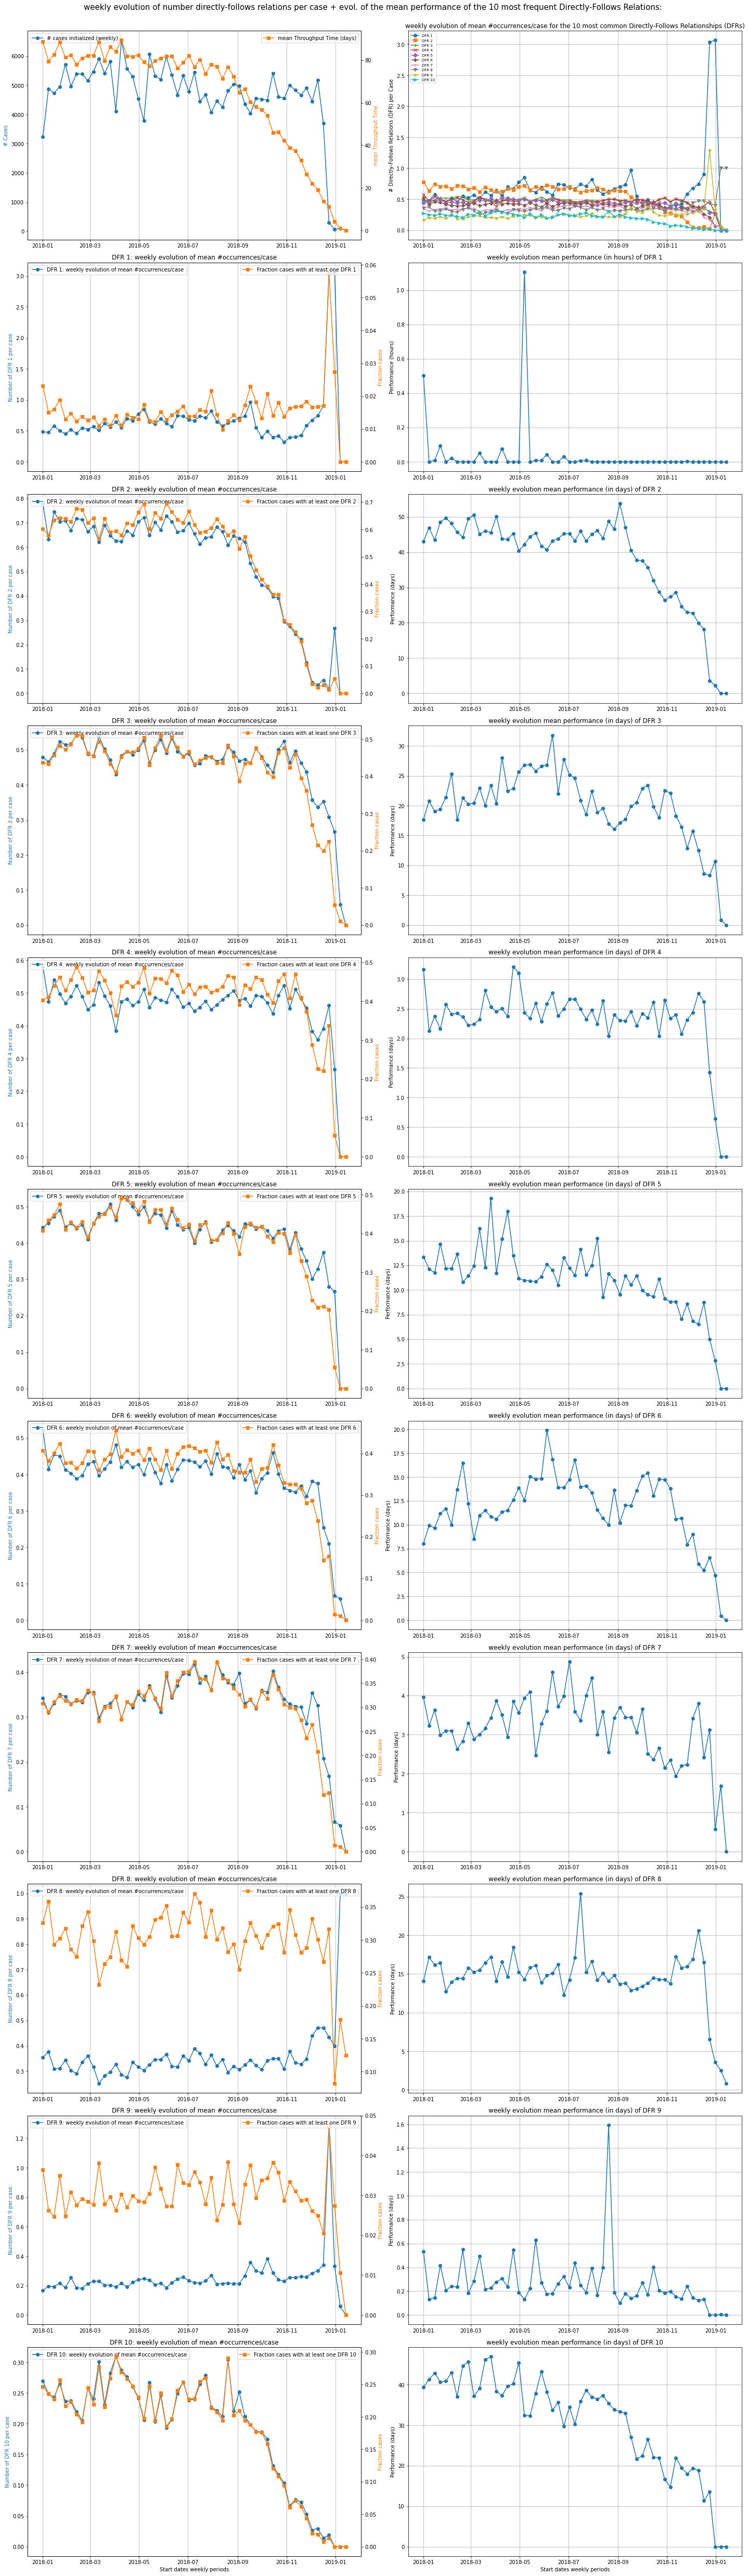

In [26]:
bpic19_plots.topK_dfr_evol(plt_type = 'type_dfr_performance', xtr_outlier_rem = False)

## __3. Categorical Case Features__ 
Only the categorical case features for which interesting trends / changes and patterns over time were identified are discussed here. 

In [27]:
categorical_casefeatures

['case:Spend area text',
 'case:Company',
 'case:Document Type',
 'case:Sub spend area text',
 'case:Purchasing Document',
 'case:Vendor',
 'case:Item Type',
 'case:Item Category',
 'case:Spend classification text',
 'case:GR-Based Inv. Verif.',
 'case:Goods Receipt']

### __3.1 Categorical Case Features: 'case:Spend area text'__

Computing additional weekly aggregations of the Throughput Time for each of the 10 most frequently occurring levels: 100%|██████████| 10/10 [00:00<00:00, 10.55it/s]


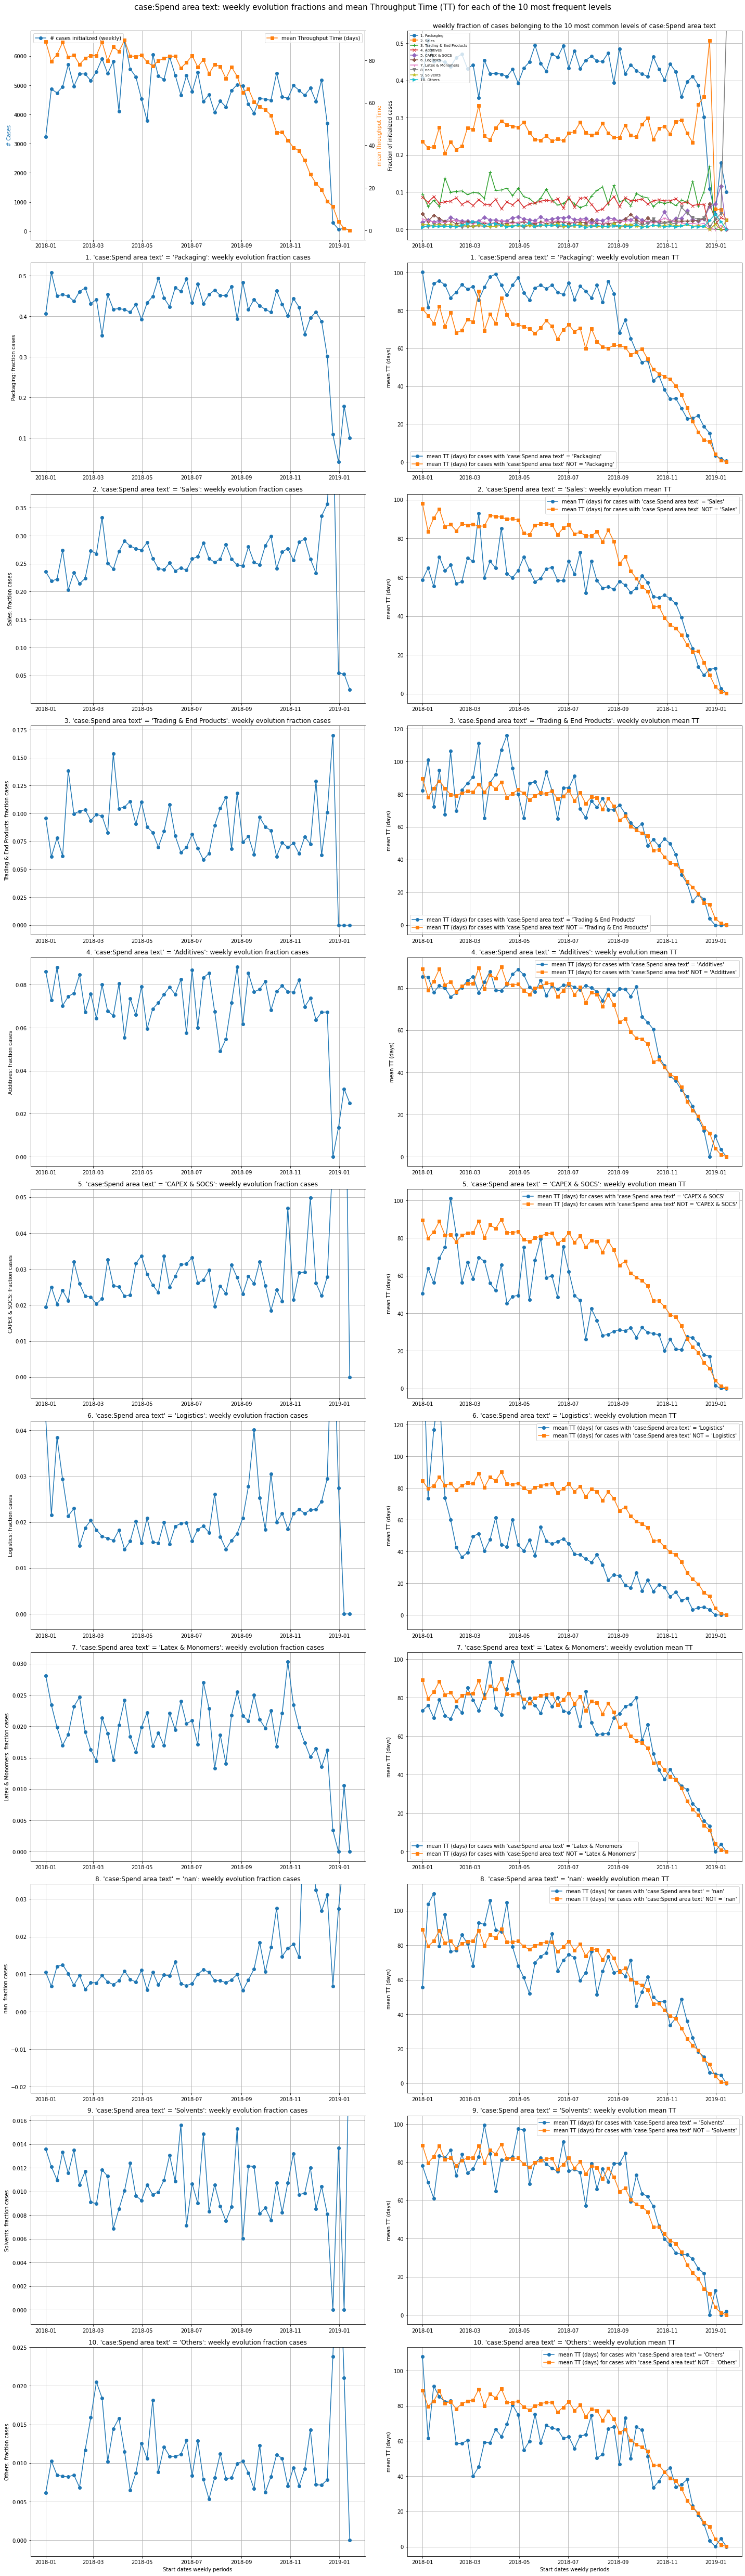

In [6]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:Spend area text', plt_type = 'type_tt')

### __3.2 Categorical Case Features: 'case:Sub spend area text'__

In [ ]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:Sub spend area text', plt_type = 'type_tt')

### __3.3 Categorical Case Features: 'case:Purchasing Document'__ (perhaps)

In [ ]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:Purchasing Document', plt_type = 'type_tt')

### __3.4 Categorical Case Features: 'case:Vendor'__

In [ ]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:Vendor', plt_type = 'type_tt')

### __3.5 Categorical Case Features: 'case:Item Category'__

In [ ]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:Item Category', plt_type = 'type_tt')

### __3.6 Categorical Case Features: 'case:Spend classification text'__ (perhaps)

In [ ]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:Spend classification text', plt_type = 'type_tt')

### __3.7 Categorical Case Features: 'case:GR-Based Inv. Verif.'__ (perhaps)

In [ ]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:GR-Based Inv. Verif.', plt_type = 'type_tt')

### __3.8 Categorical Case Features: 'case:Goods Receipt'__ (perhaps)

In [ ]:
bpic19_plots.topK_categorical_caseftr_evol(case_feature = 'case:Goods Receipt', plt_type = 'type_tt')

## __4. Categorical Event Features__ 

In [29]:
categorical_eventfeatures

['org:resource', 'concept:name', 'User']

### __4.1. Categorical Event Feature: 'org:resoruce'__

### __4.2. Categorical Event Feature: 'concept:name'__
'concept:name' refers to the column containing the __activity labels__ of each event. In this subsection, we investigate the dynamics for the 10 most frequently occurring activities over time. 

Computing the weekly aggregations for each of the 10 most frequently occurring levels of categorical event feature 'concept:name': 100%|██████████| 10/10 [00:01<00:00,  8.24it/s]
c:\Users\Brecht\OneDrive\Documenten\2022-2023 PhD y1\DyLoPro_Case_Studies\DyLoPro\plotting_utils.py:379: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(agg_df_MinusFliers, axis=0)  # max_values: shape (num series, )


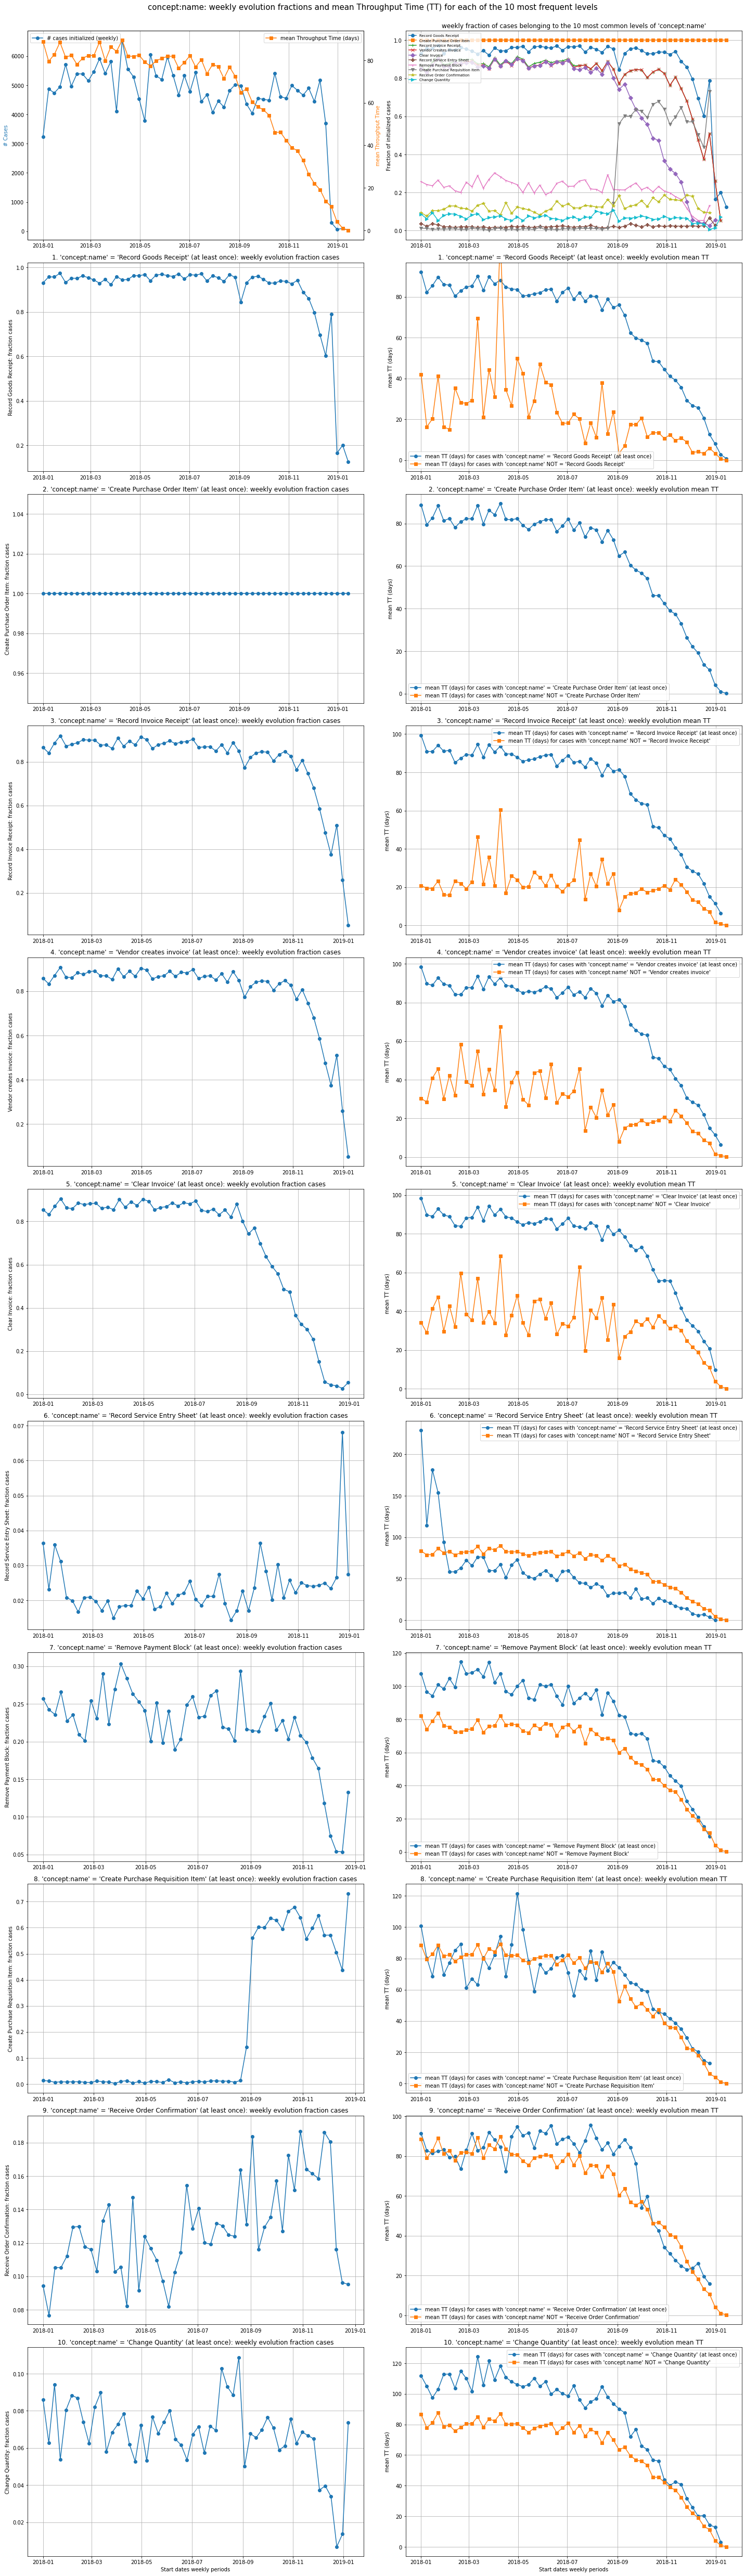

In [18]:
bpic19_plots.topK_categorical_eventftr_evol(event_feature='concept:name', plt_type = 'type_tt')

## __5. Numerical Event Features__ 

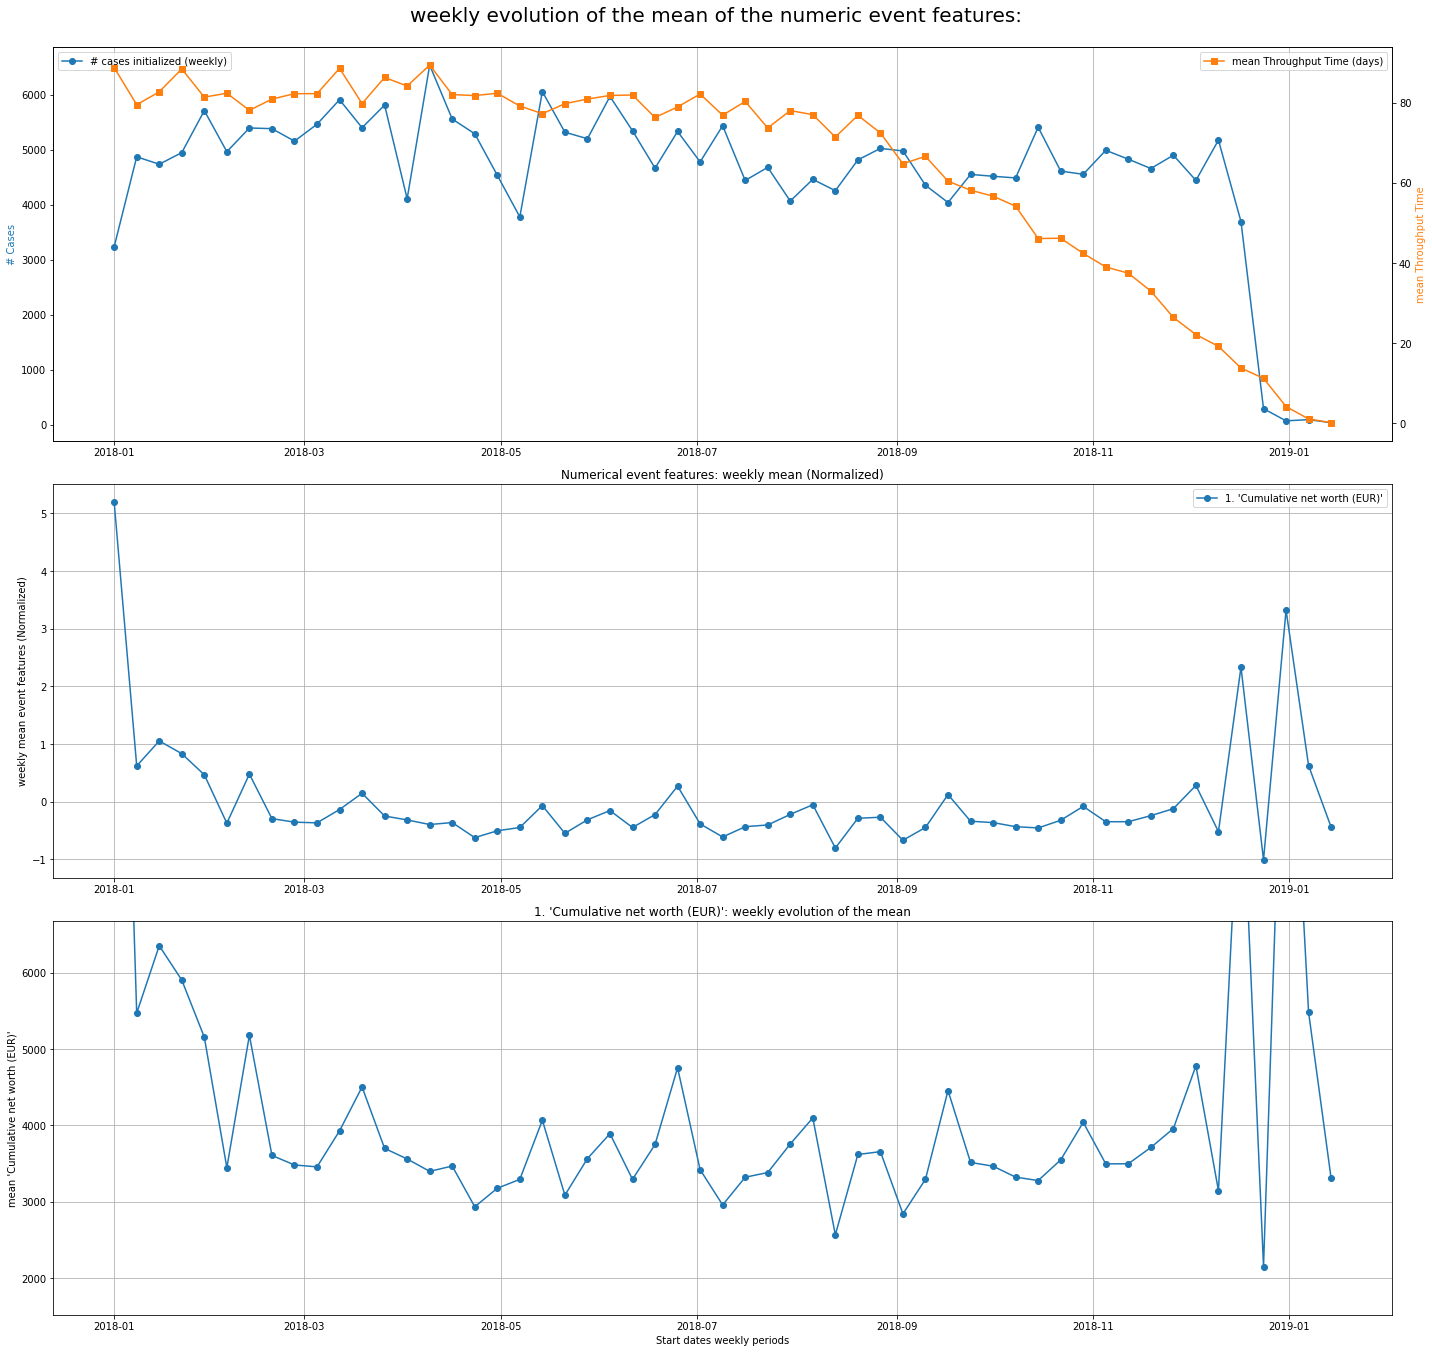

In [9]:
bpic19_plots.num_eventfts_evol(numeric_event_list= numeric_eventfeatures, numEventFt_transform='min')